In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
corr = df.corr()

In [7]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
df2 = df.copy()
def chng2(Outcome):
    if Outcome == 0:
        return 'Non-Diabetic'
    else:
        return 'Diabetic'
df2['Outcome'] = df2['Outcome'].apply(chng2)

Text(0.5, 1.0, 'Age v/s Outcome\n')

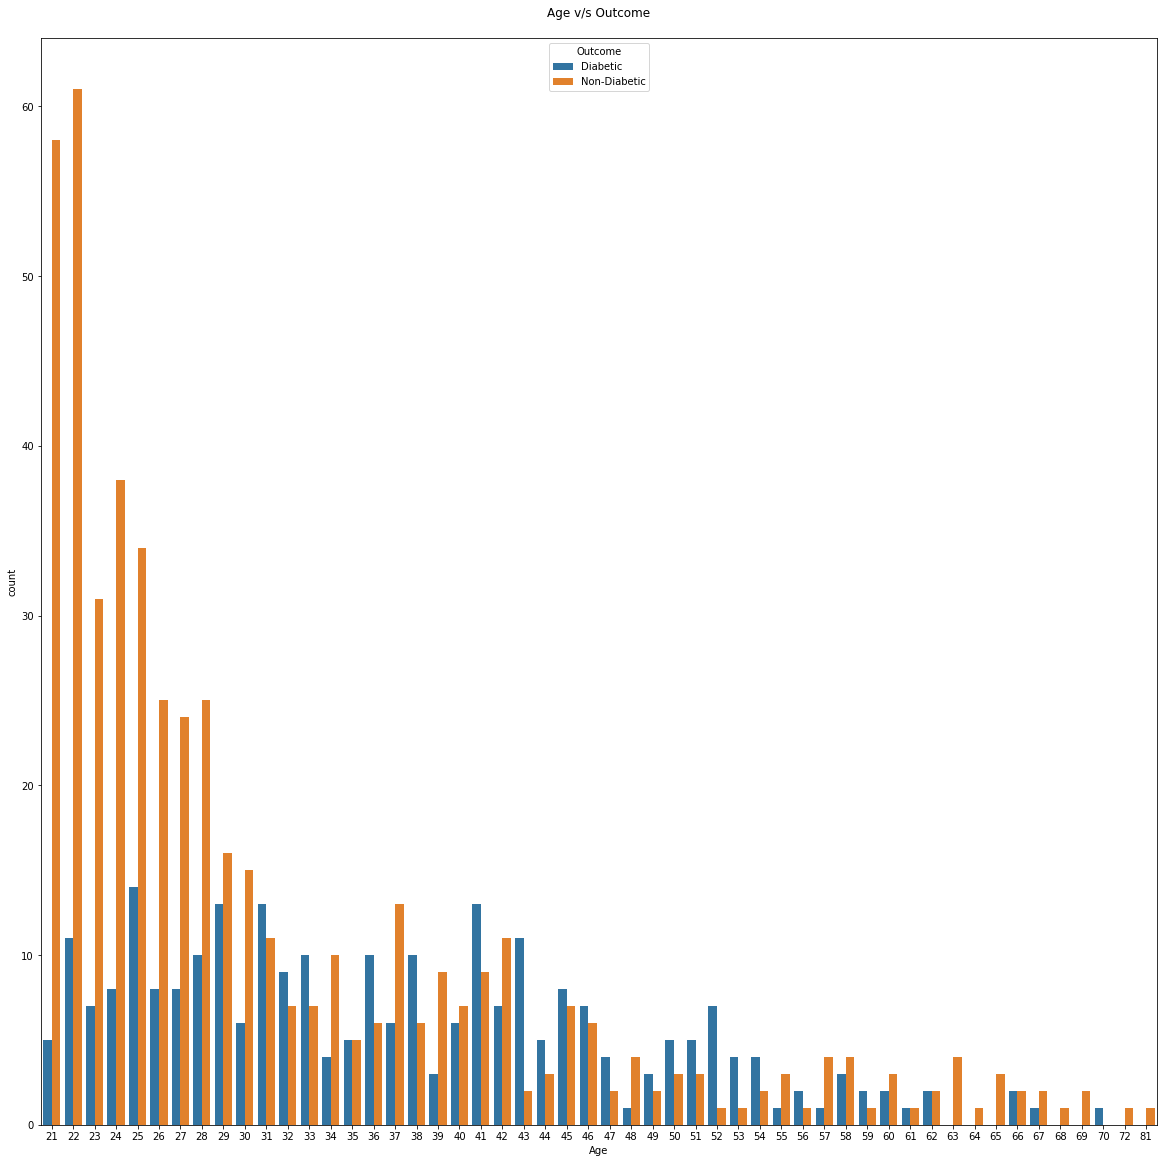

In [9]:
plt.figure(figsize=(20,20))
sns.countplot(data= df2, x='Age',hue='Outcome')
plt.title('Age v/s Outcome\n')

Text(0.5, 1.0, 'Blood-pressure v/s Outcome\n')

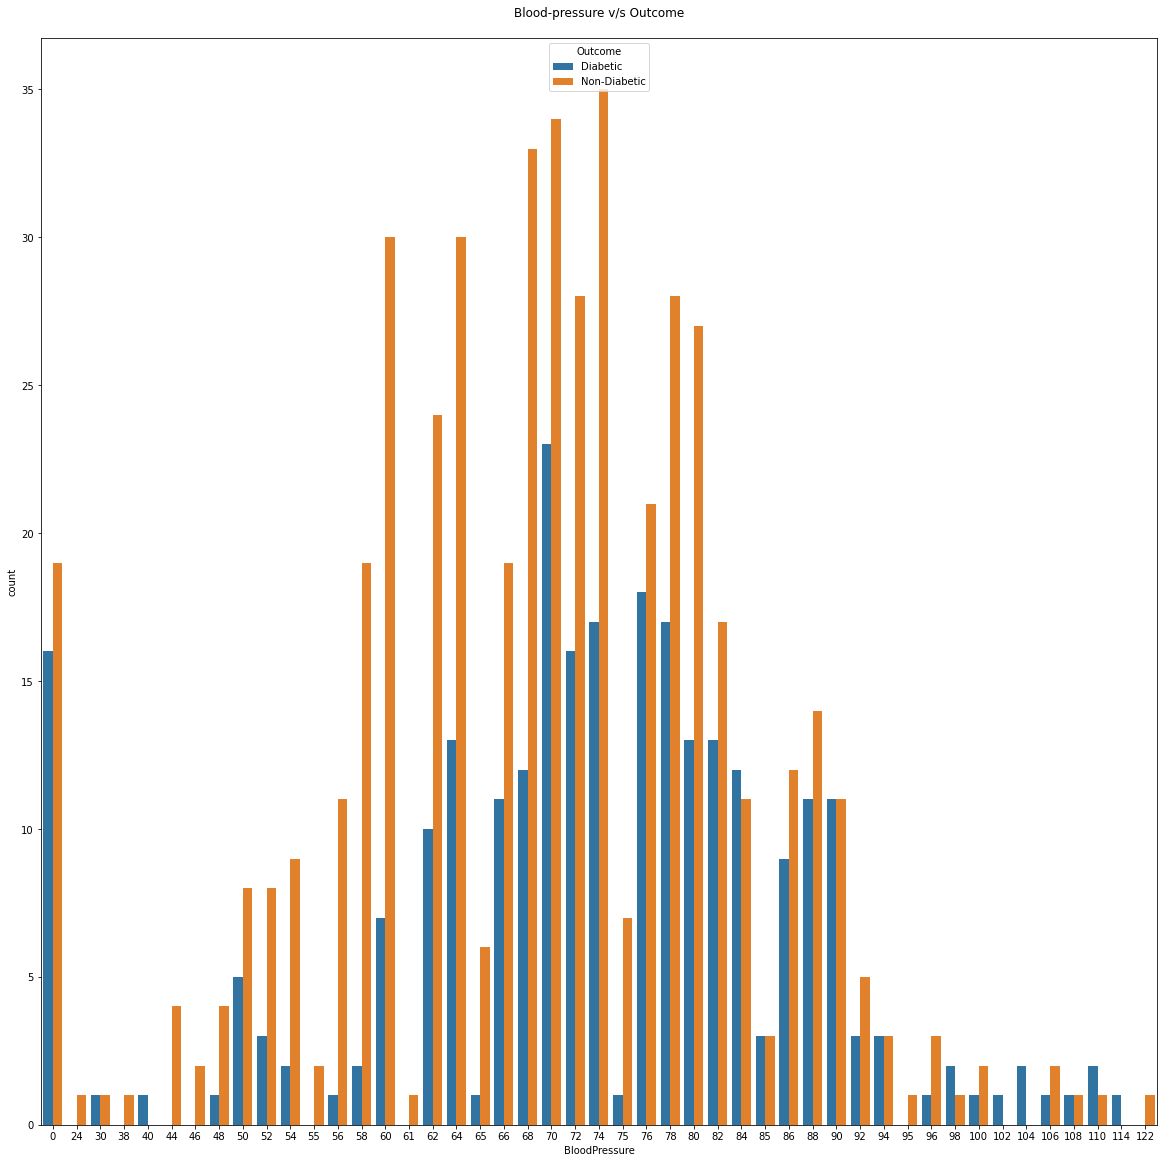

In [10]:
plt.figure(figsize=(20,20))
sns.countplot(data= df2, x='BloodPressure',hue='Outcome')
plt.title('Blood-pressure v/s Outcome\n')

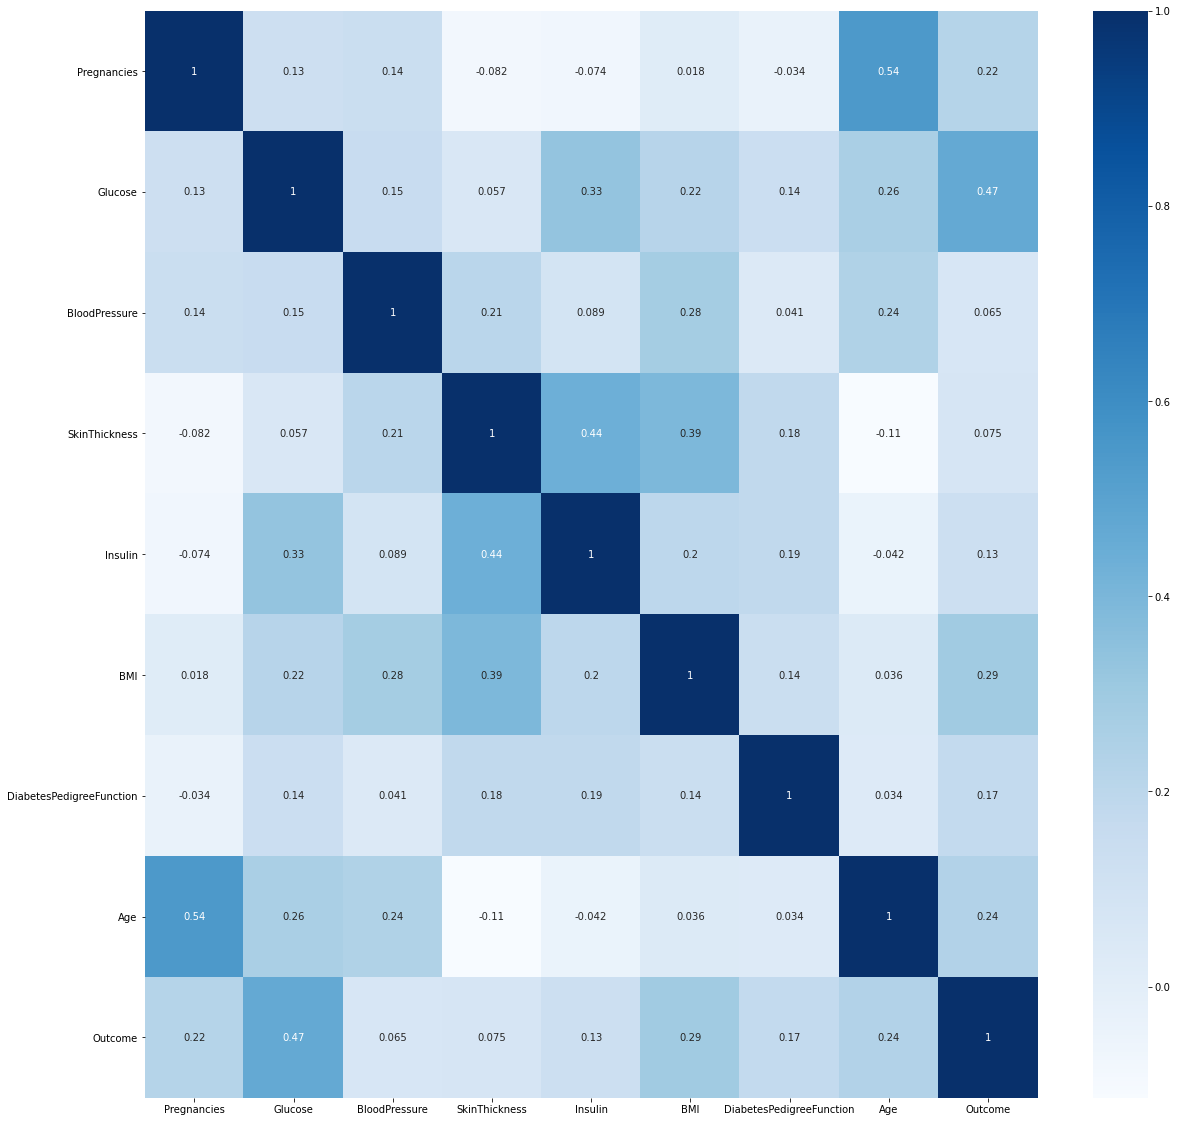

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap = 'Blues', annot=True)
plt.show()

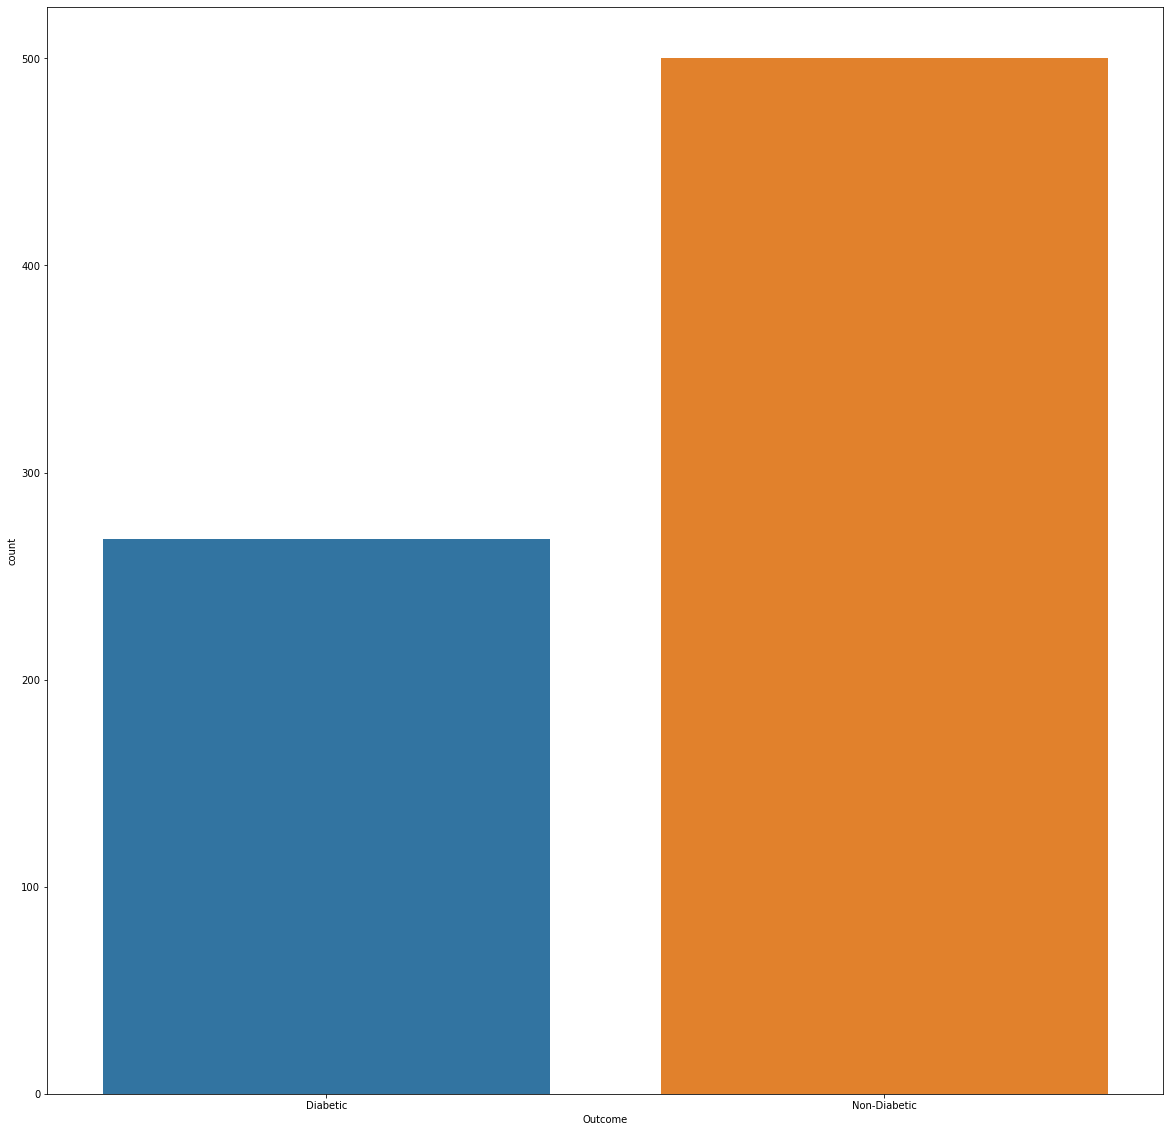

In [12]:
plt.figure(figsize=(20,20))
sns.countplot(data= df2, x= 'Outcome')

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3)

In [17]:
clf_log = LogisticRegression()

In [18]:
clf_log.fit(x_train, y_train)

C:\Users\Adarsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = clf_log.predict(x_test)

In [20]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [21]:
log_score = accuracy_score(y_test,y_pred)

In [22]:
log_score

0.7619047619047619

In [23]:
log_cm = confusion_matrix(y_test, y_pred)

In [24]:
log_cm

array([[139,  21],
       [ 34,  37]], dtype=int64)

In [25]:
clf_dec = DecisionTreeClassifier()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [27]:
clf_dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = clf_dec.predict(x_test)

In [29]:
dec_score = accuracy_score(y_test,y_pred)

In [30]:
dec_score

0.696969696969697

In [31]:
dec_cm = confusion_matrix(y_test,y_pred)

In [32]:
dec_cm

array([[124,  37],
       [ 33,  37]], dtype=int64)

In [33]:
clf_rf = RandomForestClassifier()

In [34]:
clf_rf.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
y_pred= clf_rf.predict(x_test)

In [36]:
rf_score = accuracy_score(y_test,y_pred)

In [37]:
rf_score

0.7748917748917749

In [38]:
rf_cm = confusion_matrix(y_test,y_pred)

In [39]:
rf_cm

array([[138,  23],
       [ 29,  41]], dtype=int64)

In [40]:
scores_dic = {'LogisticRegression':[log_score],'DecisionTree':[dec_score],'RandomFroest':[rf_score]}

In [41]:
score_df = pd.DataFrame(scores_dic)

In [42]:
score_df

,LogisticRegression,DecisionTree,RandomFroest
0,0.761905,0.69697,0.774892


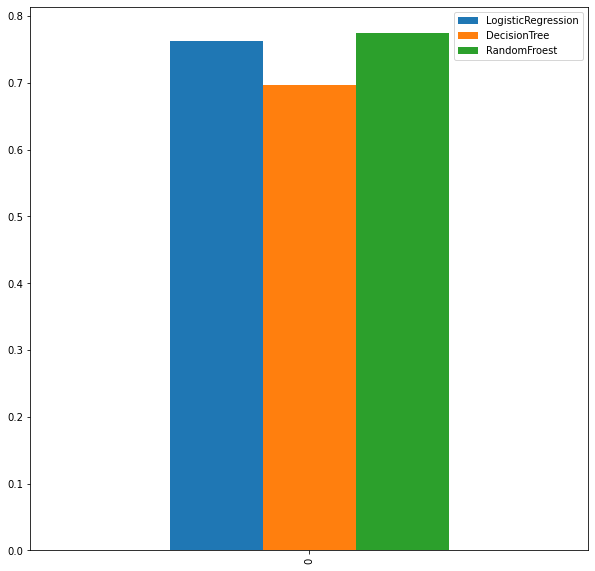

In [43]:
score_df.plot(kind='bar', figsize=(10,10))

In [44]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report_dict)

,0,1,accuracy,macro avg,weighted avg
precision,0.826347,0.640625,0.774892,0.733486,0.770068
recall,0.857143,0.585714,0.774892,0.721429,0.774892
f1-score,0.841463,0.611940,0.774892,0.726702,0.771911
support,161.000000,70.000000,0.774892,231.000000,231.000000
